# Opioid Prescriptions in the United States
An Exploration of the [Washington Post Opioid Dataset](https://www.washingtonpost.com/graphics/2019/investigations/dea-pain-pill-database/)

### Table of Contents

* [Opioid prescriptions for the US (2006-2017)](#opioid-us)
* [Opioid prescriptions by State (2006-2017)](#opioid-by-state)
* [Opioid prescriptions by County (2006-2017)](#opioid-by-county)
* [Opioid prescriptions in Tennessee (2006-2017)](#opioid-tn)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from ipyleaflet import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# magic function making plot outputs appear within the notebook
%matplotlib inline

# change the default plot output size
plt.rcParams['figure.figsize'] = [18, 8]

In [3]:
# get current working directory
cwd = os.getcwd()
data_dir = os.path.join(cwd, 'data')

# set input and output Excel files
in_nation = os.path.join(data_dir, 'OpioidsPerYearTotalAndRate.xlsx')
in_state = os.path.join(data_dir, 'OpioidRxRateByState.xlsx')
in_county = os.path.join(data_dir, 'OpioidRxRate_County.xlsx')
in_rate = os.path.join(data_dir, 'US_Opioid_OverdoseDeathsByState.xlsx')

## Opioid prescriptions for the US (2006-2017) <a class='anchor' id='opioid-us'></a>

### Total prescriptions

In [4]:
df_nation_total_rx = pd.read_excel(in_nation, sheet_name='TotalRx')
df_nation_total_rx.head()

,Year,TotalPrescriptions,PrescriptionRatePer100People
0,2006,215917663,72.4
1,2007,228543773,75.9
2,2008,237860213,78.2
3,2009,243738090,79.5
4,2010,251088904,81.2


[Text(0, 0, '0'),
 Text(0, 0, '50,000,000'),
 Text(0, 0, '100,000,000'),
 Text(0, 0, '150,000,000'),
 Text(0, 0, '200,000,000'),
 Text(0, 0, '250,000,000'),
 Text(0, 0, '300,000,000')]

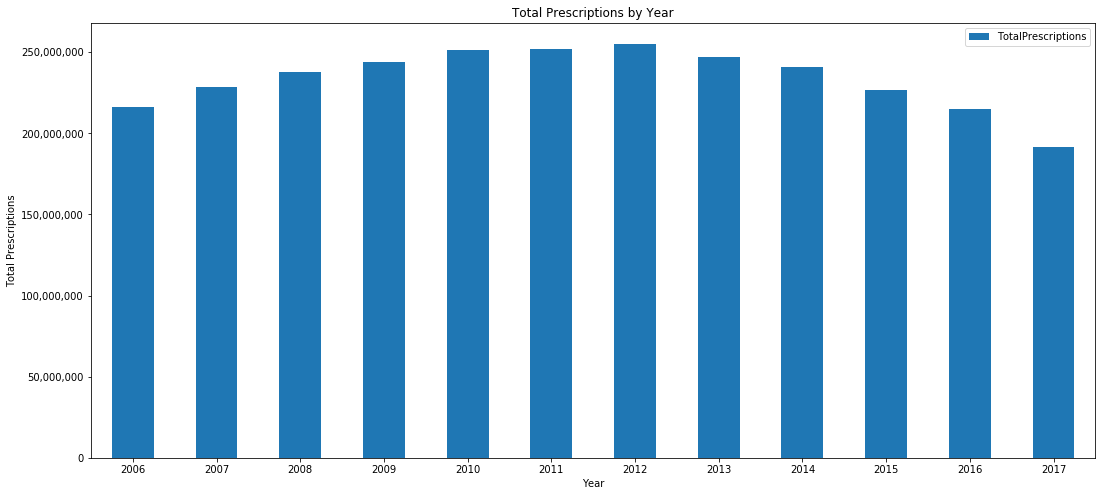

In [5]:
# Plot the trend by year
ax = df_nation_total_rx.plot.bar(x=0, y=1, title="Total Prescriptions by Year", rot=0)
ax.set_xlabel("Year")
ax.set_ylabel("Total Prescriptions")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

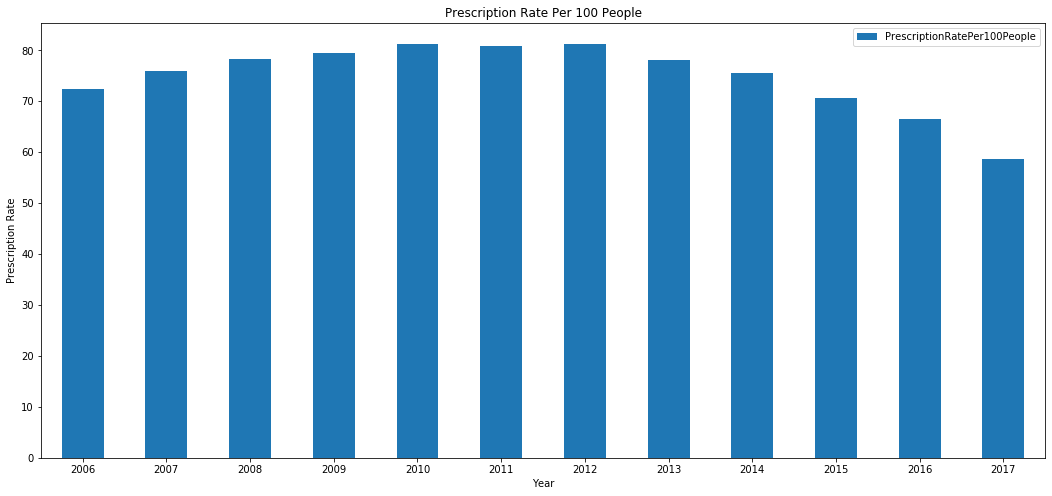

In [6]:
# Plot the trend by year
ax = df_nation_total_rx.plot.bar(x=0, y=2, title="Prescription Rate Per 100 People", rot=0)
ax.set_xlabel("Year")
ax.set_ylabel("Prescription Rate")
vals = ax.get_yticks().astype(int)
# ax.set_yticklabels(['{:,}'.format(x) for x in vals])

### County participation

In [7]:
df_nation_county_ptcp = pd.read_excel(in_nation, sheet_name='CountyParticipation')
df_nation_county_ptcp.head()

,Year,TotalCounties,CountiesWithData,PercCountiesWithData
0,2006,3143,2754,87.6
1,2007,3143,2746,87.4
2,2008,3143,2758,87.8
3,2009,3143,2750,87.5
4,2010,3143,2741,87.2


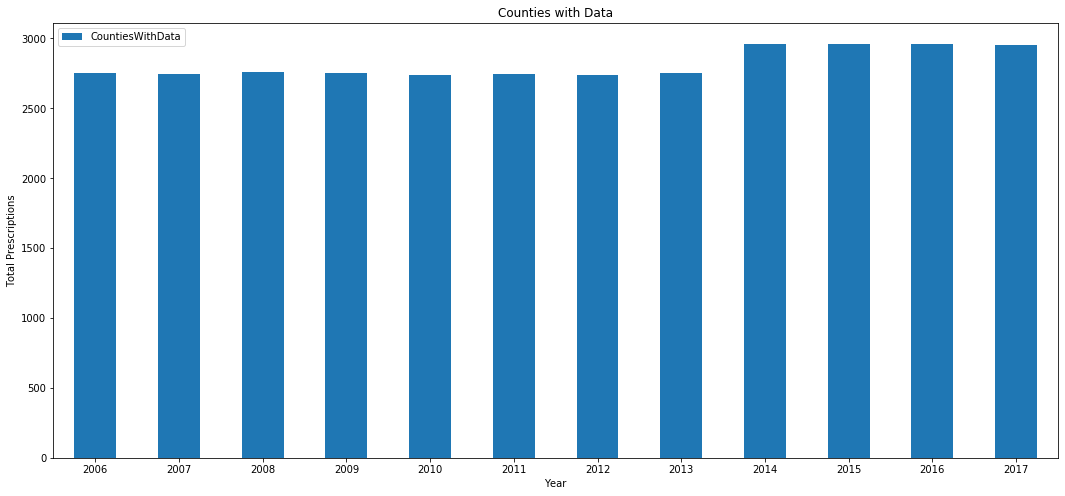

In [8]:
# Plot the trend by year
ax = df_nation_county_ptcp.plot.bar(x=0, y=2, title="Counties with Data", rot=0)
ax.set_xlabel("Year")
ax.set_ylabel("Total Prescriptions")
vals = ax.get_yticks().astype(int)
# ax.set_yticklabels(['{:,}'.format(x) for x in vals])

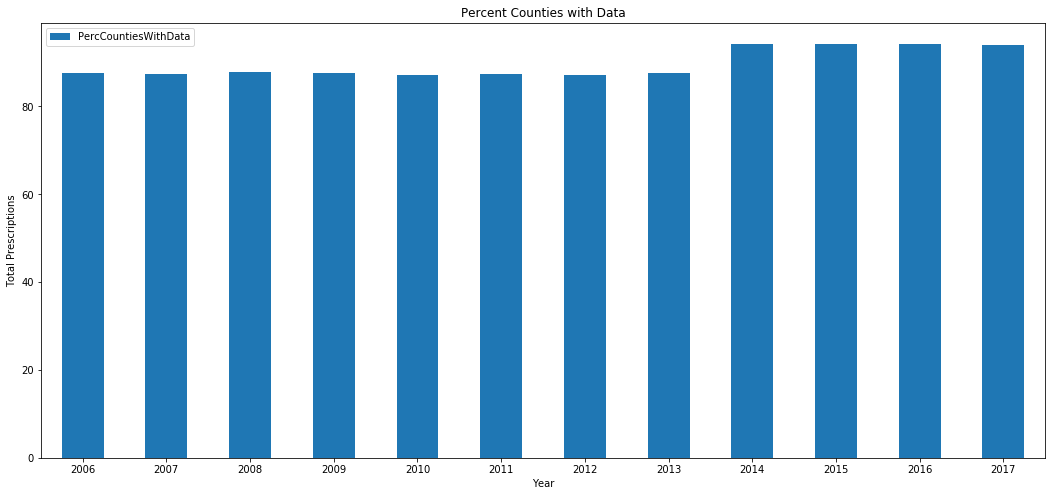

In [9]:
# Plot the trend by year
ax = df_nation_county_ptcp.plot.bar(x=0, y=3, title="Percent Counties with Data", rot=0)
ax.set_xlabel("Year")
ax.set_ylabel("Total Prescriptions")
vals = ax.get_yticks().astype(int)

## Opioid Precriptions by State (2006-2017)   <a class='anchor' id='opioid-by-state'></a>

### Merging each yearly spreadsheet into a single spreadsheet

In [10]:
df_state = pd.read_excel(in_state, sheet_name=None, ignore_index=True)

df_template = pd.read_excel(in_state, sheet_name=0)

for index, key in enumerate(df_state.keys()):
    df_year = pd.read_excel(in_state, sheet_name=key)
    df_template[key] = df_year.iloc[:, 2]
        
df_state=df_template.drop(columns=['2006 Prescribing Rate'])
df_state.head()

,State,State ABBR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,AL,115.6,120.3,126.1,131.6,134.3,136.6,143.8,142.4,135.2,125.0,121.0,107.2
1,Alaska,AK,63.4,66.6,68.5,67.3,68.4,68.0,66.8,63.7,62.7,60.8,58.9,52.0
2,Arizona,AZ,74.3,77.8,80.9,84.2,88.5,88.6,85.3,80.4,79.7,75.5,70.2,61.2
3,Arkansas,AR,98.3,108.2,112.1,116.0,120.8,115.2,121.8,120.9,123.2,117.2,114.6,105.4
4,California,CA,51.0,53.6,55.1,55.6,55.8,55.9,56.4,54.4,52.7,47.7,44.8,39.5


In [11]:
df_state['mean'] = df_state.mean(axis=1)
df_state.head()

,State,State ABBR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
0,Alabama,AL,115.6,120.3,126.1,131.6,134.3,136.6,143.8,142.4,135.2,125.0,121.0,107.2,128.258333
1,Alaska,AK,63.4,66.6,68.5,67.3,68.4,68.0,66.8,63.7,62.7,60.8,58.9,52.0,63.925000
2,Arizona,AZ,74.3,77.8,80.9,84.2,88.5,88.6,85.3,80.4,79.7,75.5,70.2,61.2,78.883333
3,Arkansas,AR,98.3,108.2,112.1,116.0,120.8,115.2,121.8,120.9,123.2,117.2,114.6,105.4,114.475000
4,California,CA,51.0,53.6,55.1,55.6,55.8,55.9,56.4,54.4,52.7,47.7,44.8,39.5,51.875000


In [12]:
out_state_file = in_state.replace(".xlsx", "_Merge.xlsx")
df_state.to_excel(out_state_file, index=False)

Text(0, 0.5, 'Prescription Rate')

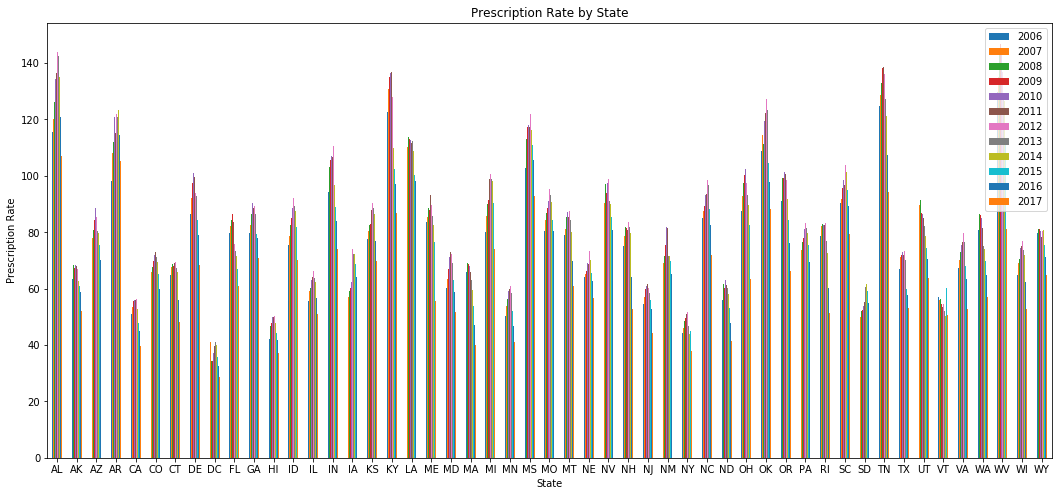

In [13]:
ax = df_state.plot.bar(x=1, y=range(2, 14), rot=0, title="Prescription Rate by State")
ax.set_xlabel("State")
ax.set_ylabel("Prescription Rate")

In [14]:
df_state_sort = df_state.sort_values(by='mean', ascending=False)
df_state_sort.head()

,State,State ABBR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
0,Alabama,AL,115.6,120.3,126.1,131.6,134.3,136.6,143.8,142.4,135.2,125.0,121.0,107.2,128.258333
48,West Virginia,WV,129.9,135.1,145.5,146.9,143.1,139.6,136.9,129.0,126.4,111.3,96.0,81.3,126.750000
42,Tennessee,TN,124.8,128.8,132.9,138.4,140.0,138.5,136.1,127.1,121.3,114.9,107.5,94.4,125.391667
17,Kentucky,KY,122.6,130.8,136.6,135.2,136.5,137.0,127.9,111.7,110.0,102.6,97.2,86.8,119.575000
3,Arkansas,AR,98.3,108.2,112.1,116.0,120.8,115.2,121.8,120.9,123.2,117.2,114.6,105.4,114.475000


Text(0, 0.5, 'Prescription Rate')

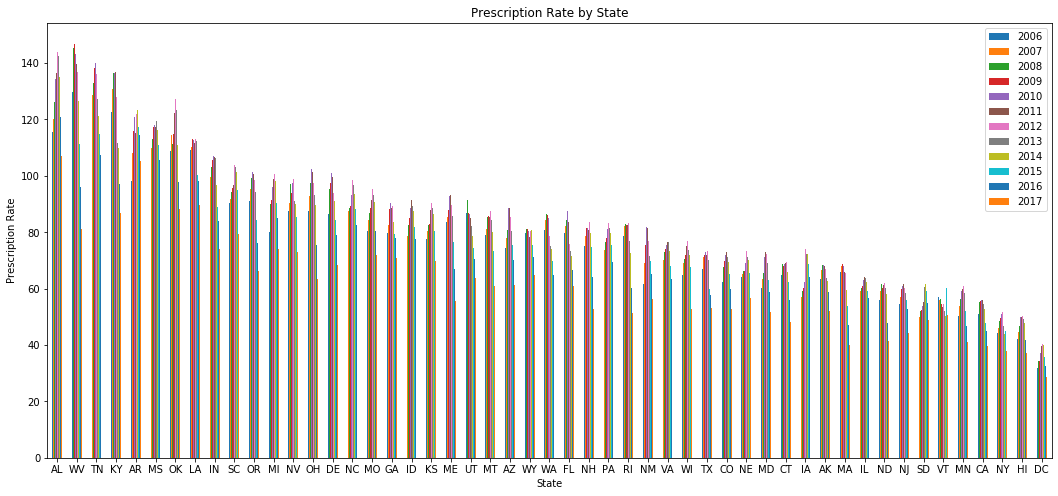

In [15]:
ax = df_state_sort.plot.bar(x=1, y=range(2, 14), rot=0, title="Prescription Rate by State")
ax.set_xlabel("State")
ax.set_ylabel("Prescription Rate")

In [16]:
df_state_top10 = df_state_sort.head(10)
df_state_top10

,State,State ABBR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
0,Alabama,AL,115.6,120.3,126.1,131.6,134.3,136.6,143.8,142.4,135.2,125.0,121.0,107.2,128.258333
48,West Virginia,WV,129.9,135.1,145.5,146.9,143.1,139.6,136.9,129.0,126.4,111.3,96.0,81.3,126.750000
42,Tennessee,TN,124.8,128.8,132.9,138.4,140.0,138.5,136.1,127.1,121.3,114.9,107.5,94.4,125.391667
17,Kentucky,KY,122.6,130.8,136.6,135.2,136.5,137.0,127.9,111.7,110.0,102.6,97.2,86.8,119.575000
3,Arkansas,AR,98.3,108.2,112.1,116.0,120.8,115.2,121.8,120.9,123.2,117.2,114.6,105.4,114.475000
24,Mississippi,MS,102.7,109.9,113.2,117.3,118.1,117.2,121.8,119.6,116.3,110.9,105.6,92.9,112.125000
36,Oklahoma,OK,108.7,114.4,111.3,115.0,119.6,122.3,127.4,123.3,110.9,104.4,97.9,88.1,111.941667
18,Louisiana,LA,109.2,110.1,113.7,113.0,112.6,111.7,113.0,112.4,108.9,100.4,98.1,89.5,107.716667
14,Indiana,IN,94.3,99.7,103.3,105.6,107.1,106.7,110.5,106.3,96.7,89.1,83.9,74.2,98.116667
40,South Carolina,SC,90.4,91.7,94.1,95.8,98.6,96.8,104.0,103.0,101.3,95.1,89.4,79.3,94.958333


### Top 10 States with the highest prescription rate

Text(0, 0.5, 'Prescription Rate')

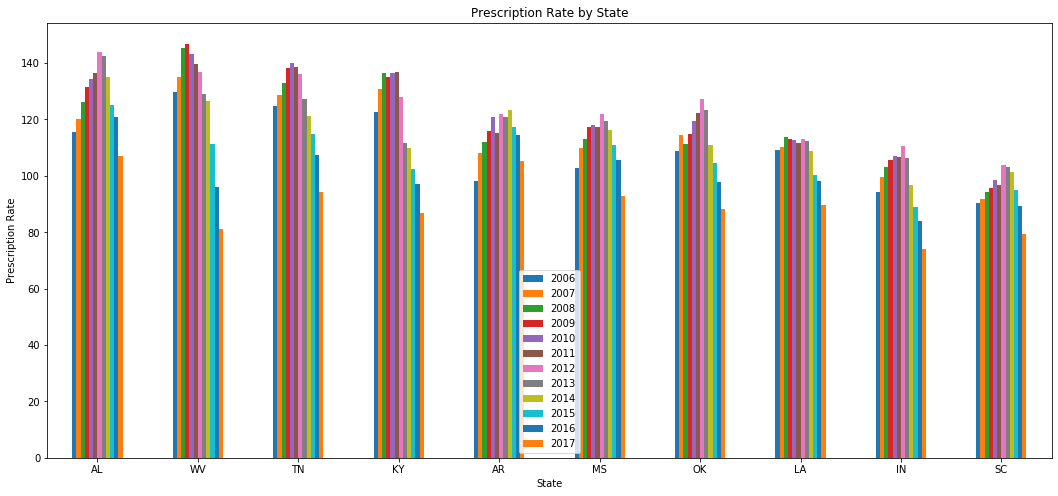

In [17]:
ax = df_state_top10.plot.bar(x=1, y=range(2, 14), rot=0, title="Prescription Rate by State")
ax.set_xlabel("State")
ax.set_ylabel("Prescription Rate")

Text(0, 0.5, 'Prescription Rate')

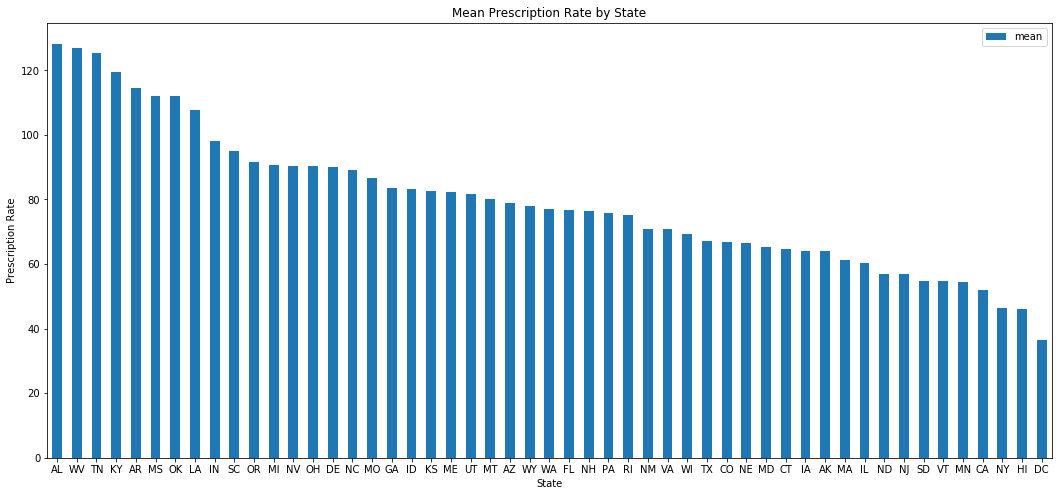

In [18]:
ax = df_state_sort.plot.bar(x=1, y=14, rot=0, title="Mean Prescription Rate by State")
ax.set_xlabel("State")
ax.set_ylabel("Prescription Rate")

## Opioid Precriptions by County (2006-2017)   <a class='anchor' id='opioid-by-county'></a>

In [19]:
df_county = pd.ExcelFile(in_county)
sheet_names =df_county.sheet_names
print(sheet_names)

num_sheets = len(df_county.sheet_names)
print(f"Total number of sheets: {num_sheets}")

['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', 'AllCounties2006-2017']
Total number of sheets: 13


In [20]:
sheet_template = df_county.parse(sheet_name=sheet_names[0])[["County", "State", "FIPS County Code"]]
sheet_template.head()

,County,State,FIPS County Code
0,"Autauga, AL",AL,1001
1,"Baldwin, AL",AL,1003
2,"Barbour, AL",AL,1005
3,"Bibb, AL",AL,1007
4,"Blount, AL",AL,1009


### Merging each yearly spreadsheet into a single spreadsheet

In [21]:
for sheet_name in sheet_names[:-1]:
    print(sheet_name)
    sheet_year = df_county.parse(sheet_name)
#     print(sheet_year.head()).
    sheet_template= pd.merge(sheet_template, sheet_year, how='left', on=['FIPS County Code'])
#     print(sheet_template.head())

sheet_template.head()

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


,County_x,State_x,FIPS County Code,County_y,State_y,2006 Prescribing Rate,County,State,2007 Prescribing Rate,County _x,...,2014 Prescribing Rate,County _y,State _y,2015 Prescribing Rate,County _x,State _x,2016 Prescribing Rate,County _y,State _y,2017 Prescribing Rate
0,"Autauga, AL",AL,1001,"Autauga, AL",AL,134.8,"Autauga, AL",AL,135.8,"Autauga, AL",...,145.3,"Autauga, AL",AL,129.9,"Autauga, AL",AL,129.6,AUTAUGA,AL,106.6
1,"Baldwin, AL",AL,1003,"Baldwin, AL",AL,127.8,"Baldwin, AL",AL,133.2,"Baldwin, AL",...,143.5,"Baldwin, AL",AL,132.1,"Baldwin, AL",AL,123.8,BALDWIN,AL,106.7
2,"Barbour, AL",AL,1005,"Barbour, AL",AL,78.1,"Barbour, AL",AL,72.7,"Barbour, AL",...,102.0,"Barbour, AL",AL,93.3,"Barbour, AL",AL,92.7,BARBOUR,AL,90.7
3,"Bibb, AL",AL,1007,"Bibb, AL",AL,114.3,"Bibb, AL",AL,116.1,"Bibb, AL",...,75.8,"Bibb, AL",AL,69.4,"Bibb, AL",AL,97.2,BIBB,AL,80.6
4,"Blount, AL",AL,1009,"Blount, AL",AL,40.3,"Blount, AL",AL,44.6,"Blount, AL",...,63.2,"Blount, AL",AL,57.9,"Blount, AL",AL,56.9,BLOUNT,AL,48.9


Filter and select columns:

In [22]:
filter_col = ["County", "State", "FIPS County Code"] + [col for col in sheet_template if col.startswith('20')]
filter_col

['County',
 'State',
 'FIPS County Code',
 '2006 Prescribing Rate',
 '2007 Prescribing Rate',
 '2008 Prescribing Rate',
 '2009 Prescribing Rate',
 '2010 Prescribing Rate',
 '2011 Prescribing Rate',
 '2012 Prescribing Rate',
 '2013 Prescribing Rate',
 '2014 Prescribing Rate',
 '2015 Prescribing Rate',
 '2016 Prescribing Rate',
 '2017 Prescribing Rate']

Display selected columns:

In [23]:
df_county_merge = sheet_template[filter_col]
df_county_merge.head()

,County,State,FIPS County Code,2006 Prescribing Rate,2007 Prescribing Rate,2008 Prescribing Rate,2009 Prescribing Rate,2010 Prescribing Rate,2011 Prescribing Rate,2012 Prescribing Rate,2013 Prescribing Rate,2014 Prescribing Rate,2015 Prescribing Rate,2016 Prescribing Rate,2017 Prescribing Rate
0,"Autauga, AL",AL,1001,134.8,135.8,144.9,147.5,151.7,144.1,157.8,166.7,145.3,129.9,129.6,106.6
1,"Baldwin, AL",AL,1003,127.8,133.2,138.3,143.9,143.8,150.0,156.4,154.3,143.5,132.1,123.8,106.7
2,"Barbour, AL",AL,1005,78.1,72.7,79.6,88.5,97.0,99.4,118.3,107.5,102.0,93.3,92.7,90.7
3,"Bibb, AL",AL,1007,114.3,116.1,119.6,109.6,58.9,57.7,69.2,70.5,75.8,69.4,97.2,80.6
4,"Blount, AL",AL,1009,40.3,44.6,58.2,56.2,60.1,64.8,66.6,65.9,63.2,57.9,56.9,48.9


In [24]:
col_names = ["County", "State", "FIPS County Code"] + sheet_names[:-1]
print(col_names)

['County', 'State', 'FIPS County Code', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


Change column names:

In [25]:
df_county_merge.columns = col_names
df_county_merge['FIPS County Code']= df_county_merge['FIPS County Code'].astype(str)
df_county_merge['FIPS County Code'] = df_county_merge['FIPS County Code'].apply(lambda x: x.zfill(5))
df_county_merge.head()

,County,State,FIPS County Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"Autauga, AL",AL,01001,134.8,135.8,144.9,147.5,151.7,144.1,157.8,166.7,145.3,129.9,129.6,106.6
1,"Baldwin, AL",AL,01003,127.8,133.2,138.3,143.9,143.8,150.0,156.4,154.3,143.5,132.1,123.8,106.7
2,"Barbour, AL",AL,01005,78.1,72.7,79.6,88.5,97.0,99.4,118.3,107.5,102.0,93.3,92.7,90.7
3,"Bibb, AL",AL,01007,114.3,116.1,119.6,109.6,58.9,57.7,69.2,70.5,75.8,69.4,97.2,80.6
4,"Blount, AL",AL,01009,40.3,44.6,58.2,56.2,60.1,64.8,66.6,65.9,63.2,57.9,56.9,48.9


Create a mean column:

In [26]:
df_county_merge = df_county_merge.replace(-9999, np.nan)
df_county_merge['mean'] = df_county_merge.mean(axis=1)
df_county_merge.head()

,County,State,FIPS County Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
0,"Autauga, AL",AL,01001,134.8,135.8,144.9,147.5,151.7,144.1,157.8,166.7,145.3,129.9,129.6,106.6,141.225000
1,"Baldwin, AL",AL,01003,127.8,133.2,138.3,143.9,143.8,150.0,156.4,154.3,143.5,132.1,123.8,106.7,137.816667
2,"Barbour, AL",AL,01005,78.1,72.7,79.6,88.5,97.0,99.4,118.3,107.5,102.0,93.3,92.7,90.7,93.316667
3,"Bibb, AL",AL,01007,114.3,116.1,119.6,109.6,58.9,57.7,69.2,70.5,75.8,69.4,97.2,80.6,86.575000
4,"Blount, AL",AL,01009,40.3,44.6,58.2,56.2,60.1,64.8,66.6,65.9,63.2,57.9,56.9,48.9,56.966667


Save the merged opioid data as a new Excel file:

In [27]:
out_county_file = in_county.replace(".xlsx", "_Merge.xlsx")
df_county_merge.to_excel(out_county_file, index=False)

Sort mean prescription rate by county:

In [28]:
df_county = pd.read_excel(out_county_file, sheet_name=0, ignore_index=True)
df_county_sort = df_county.sort_values(by='mean', ascending=False)
df_county_top10 = df_county_sort.head(10)
df_county_top10

,County,State,FIPS County Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
2937,"Martinsville, VA",VA,51690,403.3,438.4,474.7,520.1,566.4,583.8,548.1,521.8,532.5,444.4,399.9,336.4,480.816667
2940,"Norton, VA",VA,51720,251.6,257.6,296.0,300.9,361.6,412.0,570.1,578.1,563.3,504.9,470.3,396.1,413.541667
2929,"Galax, VA",VA,51640,383.9,400.8,428.0,398.5,360.0,409.4,439.2,457.1,460.3,431.1,394.4,345.1,408.983333
999,"Bell, KY",KY,21013,346.3,377.3,382.8,365.1,366.3,347.1,281.9,266.0,271.8,252.7,249.7,228.4,311.283333
1028,"Floyd, KY",KY,21071,263.3,292.4,342.9,353.3,386.0,426.4,387.2,290.1,263.1,245.0,226.2,215.9,307.650000
1110,"Whitley, KY",KY,21235,301.6,312.2,316.1,308.6,325.4,345.6,364.2,312.0,300.1,265.2,239.6,220.9,300.958333
63,"Walker, AL",AL,1127,304.1,306.5,312.4,329.8,338.1,340.2,335.1,317.1,291.1,249.9,235.4,216.1,297.983333
1090,"Pike, KY",KY,21195,387.5,408.7,332.1,324.1,315.4,315.5,306.2,267.7,263.1,242.4,220.0,191.4,297.841667
3015,"Logan, WV",WV,54045,350.3,354.7,342.4,320.3,287.4,291.0,300.1,272.4,263.0,206.6,194.3,170.7,279.433333
2933,"Lexington, VA",VA,51678,205.0,238.3,274.3,279.9,276.5,288.2,334.2,335.3,325.7,269.0,237.0,213.5,273.075000


Text(0, 0.5, 'Prescription Rate')

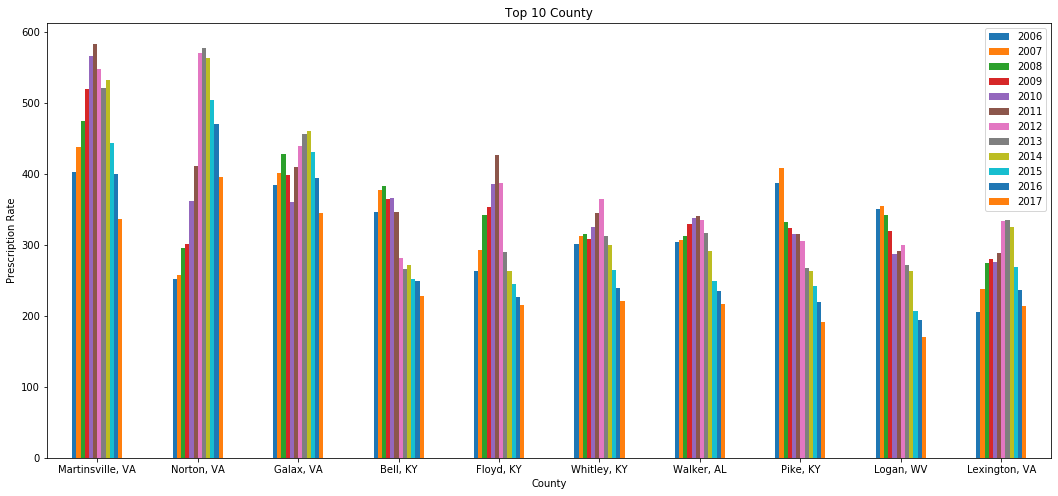

In [29]:
ax = df_county_top10.plot.bar(x=0, y=range(3, 15), rot=0, title="Top 10 County")
ax.set_xlabel("County")
ax.set_ylabel("Prescription Rate")

Text(0, 0.5, 'Prescription Rate')

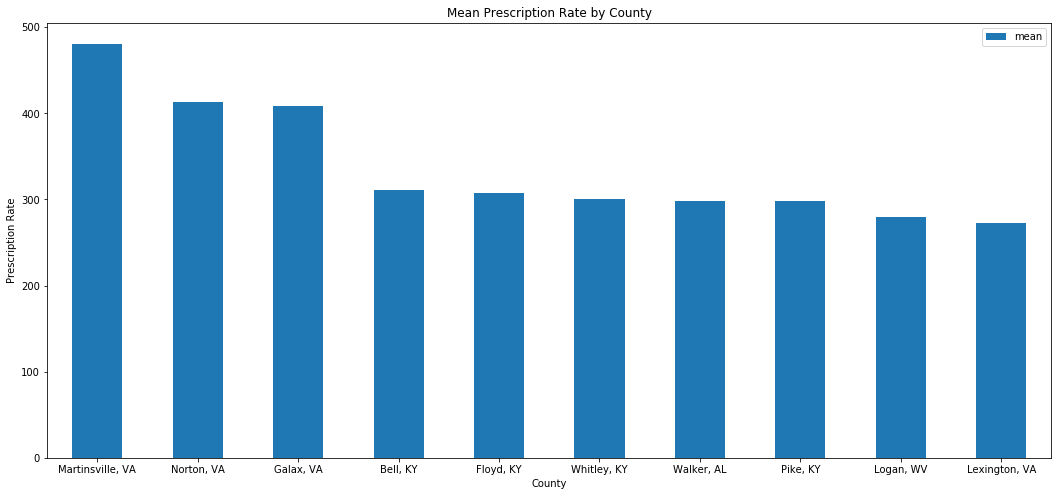

In [30]:
ax = df_county_top10.plot.bar(x=0, y=15, rot=0, title="Mean Prescription Rate by County")
ax.set_xlabel("County")
ax.set_ylabel("Prescription Rate")

## Opioid Prescriptions in Tennessee (2006-2017)   <a class='anchor' id='opioid-tn'></a>

Select Tennessee opioid data by county:

In [31]:
df_tn = df_county[df_county['State']=='TN']
df_tn.head(10)

,County,State,FIPS County Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
2428,"Anderson, TN",TN,47001,203.1,197.1,206.5,204.0,209.2,209.8,202.1,185.4,180.3,167.9,147.4,126.2,186.583333
2429,"Bedford, TN",TN,47003,97.8,99.2,102.1,114.2,118.8,120.4,124.6,126.7,124.2,111.1,101.5,94.2,111.233333
2430,"Benton, TN",TN,47005,17.6,20.0,21.6,21.5,22.2,62.6,167.6,143.8,151.8,143.5,136.7,119.0,85.658333
2431,"Bledsoe, TN",TN,47007,103.6,111.1,119.6,124.0,121.7,104.0,110.7,91.0,86.2,87.8,83.6,72.7,101.333333
2432,"Blount, TN",TN,47009,118.9,126.0,135.3,138.0,139.5,131.0,125.0,111.9,110.1,102.0,91.0,80.2,117.408333
2433,"Bradley, TN",TN,47011,136.0,142.7,156.4,169.4,182.6,183.7,185.1,159.2,148.9,141.3,129.9,113.7,154.075000
2434,"Campbell, TN",TN,47013,193.6,242.7,224.6,233.7,209.1,257.3,257.0,235.6,244.1,228.1,195.6,172.0,224.450000
2435,"Cannon, TN",TN,47015,127.9,125.8,123.5,127.6,129.6,136.3,120.3,125.6,121.1,108.2,101.9,95.1,120.241667
2436,"Carroll, TN",TN,47017,209.2,208.8,255.1,265.8,240.5,210.4,186.1,174.9,164.2,148.7,139.8,119.0,193.541667
2437,"Carter, TN",TN,47019,126.8,132.4,129.2,140.6,139.9,136.8,133.0,121.8,119.2,113.2,109.5,98.8,125.100000


Text(0, 0.5, 'Prescription Rate')

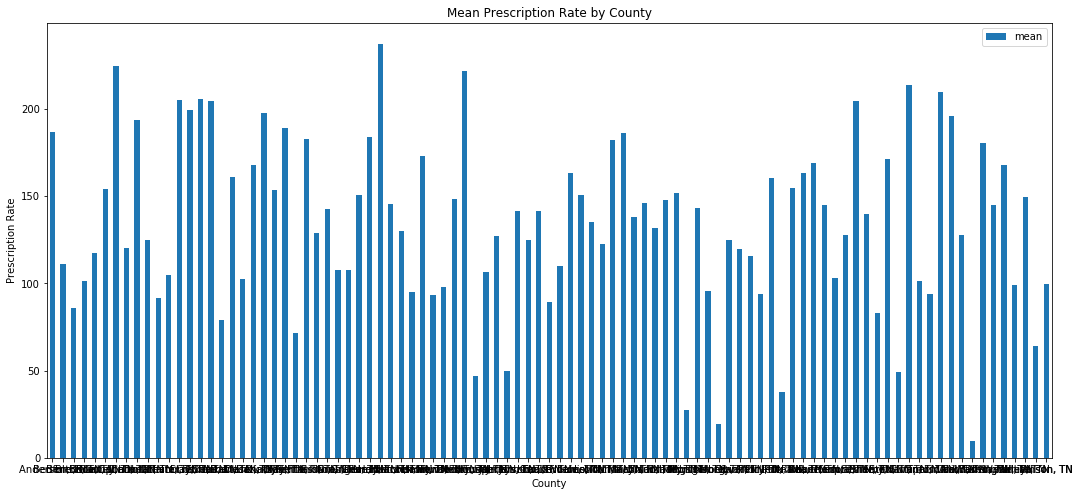

In [32]:
ax = df_tn.plot.bar(x=0, y=15, rot=0, title="Mean Prescription Rate by County")
ax.set_xlabel("County")
ax.set_ylabel("Prescription Rate")

Text(0, 0.5, 'Prescription Rate')

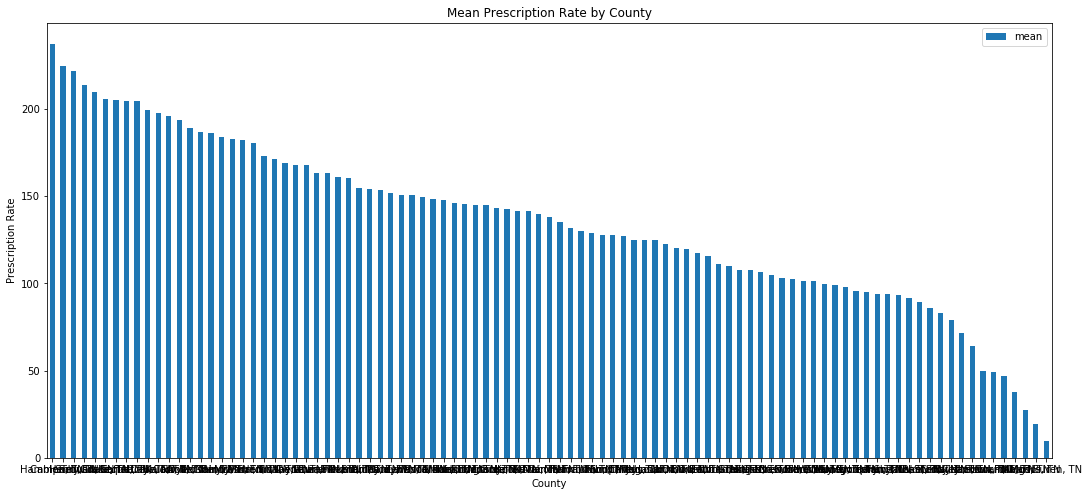

In [33]:
df_tn_sort = df_tn.sort_values(by='mean', ascending=False)
ax = df_tn_sort.plot.bar(x=0, y=15, rot=0, title="Mean Prescription Rate by County")
ax.set_xlabel("County")
ax.set_ylabel("Prescription Rate")

In [34]:
df_tn_top10 = df_tn_sort.head(10)
df_tn_top10

,County,State,FIPS County Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
2459,"Hamblen, TN",TN,47063,281.3,289.3,286.1,283.1,281.9,261.7,251.6,226.1,199.9,180.4,163.2,143.6,237.350000
2434,"Campbell, TN",TN,47013,193.6,242.7,224.6,233.7,209.1,257.3,257.0,235.6,244.1,228.1,195.6,172.0,224.450000
2467,"Henry, TN",TN,47079,223.9,254.7,251.8,264.7,258.9,220.7,214.6,215.3,203.8,196.1,188.7,166.8,221.666667
2509,"Sullivan, TN",TN,47163,250.4,260.0,237.9,238.1,237.5,240.6,221.7,201.6,189.7,178.2,165.0,145.0,213.808333
2512,"Trousdale, TN",TN,47169,107.2,114.3,162.9,226.3,267.1,309.3,296.4,280.9,236.8,212.2,171.7,128.0,209.425000
2442,"Cocke, TN",TN,47029,153.9,219.5,235.6,240.7,216.3,224.4,203.4,205.0,213.9,201.5,188.3,162.6,205.425000
2440,"Claiborne, TN",TN,47025,190.7,183.9,187.3,210.0,202.7,203.3,240.8,242.2,232.2,219.4,189.4,159.2,205.091667
2443,"Coffee, TN",TN,47031,219.1,213.5,212.4,217.5,225.5,219.9,234.8,220.1,192.9,175.5,169.5,156.4,204.758333
2504,"Sequatchie, TN",TN,47153,177.7,183.4,221.0,240.0,259.1,253.9,213.6,194.1,186.2,191.3,175.2,159.7,204.600000
2441,"Clay, TN",TN,47027,123.1,144.9,243.7,239.0,237.3,198.8,243.6,206.0,185.9,189.0,189.9,191.3,199.375000


Text(0, 0.5, 'Prescription Rate')

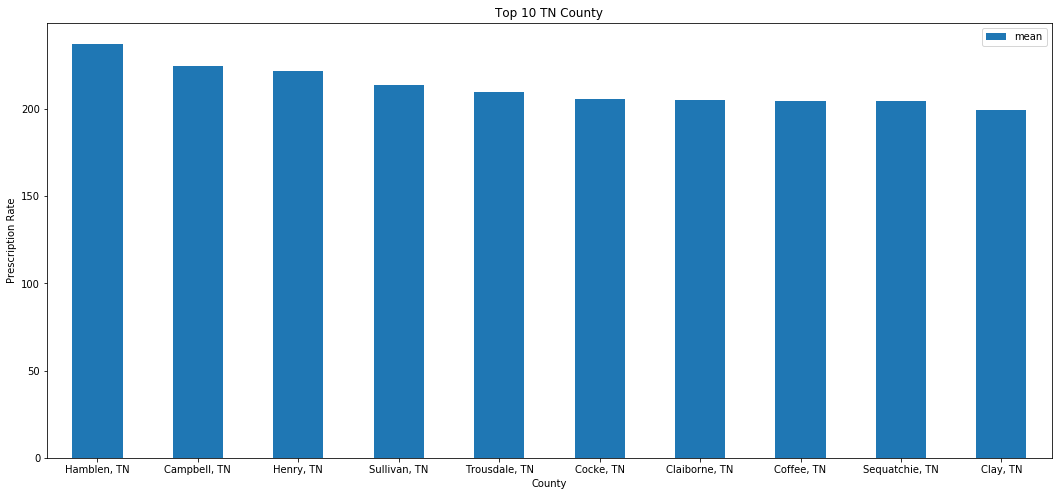

In [35]:
ax = df_tn_top10.plot.bar(x=0, y=15, rot=0, title="Top 10 TN County")
ax.set_xlabel("County")
ax.set_ylabel("Prescription Rate")

Text(0, 0.5, 'Prescription Rate')

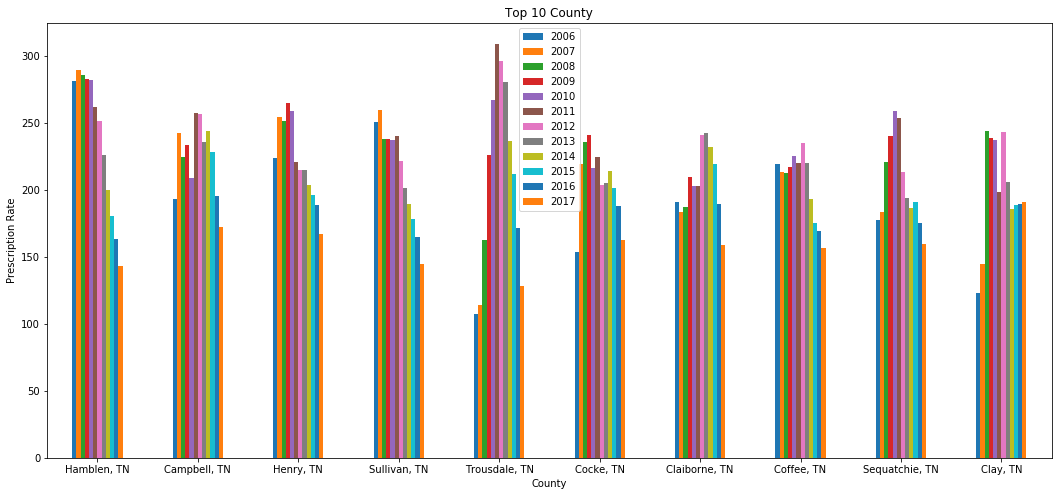

In [36]:
ax = df_tn_top10.plot.bar(x=0, y=range(3, 15), rot=0, title="Top 10 County")
ax.set_xlabel("County")
ax.set_ylabel("Prescription Rate")